## 2022 Hong Kong IPO Data Analysis<br/>
### Imports

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import math
import requests
import warnings
warnings.filterwarnings("ignore")
from datetime import date
from datetime import datetime, timedelta
from dateutil.relativedelta import *
import yfinance as yf
yf.pdr_override()

### Clean Data

In [2]:
obs = pd.read_csv(r'C:\Users\Isabe\Datasets\HK IPO 2022.csv')

In [3]:
obs.columns = obs.iloc[0]
obs = obs.drop(obs.columns[[0]], axis=1)
obs = obs.drop([0])

In [4]:
obs[['Funds Raised (HK$)',
                                                                                    ' IPO Subscription Price (HK$)',
                                                                                    'Funds Raised_international',
                                                                               '  IPO Subscription Price_international ',
                                                                                                              'FX rate',
                                                                                             'Authorized Share Capital',
                                                                                               'Total (without option)',
                                                                                     'Global Offering (without option)',
                                                              'Number of offer shares under the capitalization Issue',
                                                                     'Number of offer shares under Capitalization Rest',
                                                                                                        'Sale Shares',
                                                                                                          'New shares ',
                                                                                                       'Placing Shares',
                                                                                                  'Public Offer shares',
                                                                                                'Maximum Offer Price',
                                                                                                  'Minimum Offer Price',
                                                                          'total assets in year-3 (3 years before IPO)',
                                                                                               'total assets in year-2',
                                                                                               'total assets in year-1',
                                                                                               'total equity in year-3',
                                                                                               'total equity in year-2',
                                                                                               'total equity in year-1',
                                                                                            'total liability in year-3',
                                                                                            'total liability in year-2',
                                                                                            'total liability in year-1',
                                                                                                  'Net sales in year-3',
                                                                                                  'Net sales in year-2',
                                                                                                  'Net sales in year-1',
                                                                                          'Profit before tax in year-3',
                                                                                          'Profit before tax in year-2',
                                                                                          'Profit before tax in year-1',
                                                                                        'Profit for the year in year-3',
                                                                                        'Profit for the year in year-2',
                                                                                        'Profit for the year in year-1',
                                                                                                      'Gross spread ',
                                                                                            'Over-allotment Option (%)',
                                                                                           'Subscription Ratio (times)'
     ]] = obs[['Funds Raised (HK$)',
                                                                                    ' IPO Subscription Price (HK$)',
                                                                                    'Funds Raised_international',
                                                                               '  IPO Subscription Price_international ',
                                                                                                              'FX rate',
                                                                                             'Authorized Share Capital',
                                                                                               'Total (without option)',
                                                                                     'Global Offering (without option)',
                                                              'Number of offer shares under the capitalization Issue',
                                                                     'Number of offer shares under Capitalization Rest',
                                                                                                        'Sale Shares',
                                                                                                          'New shares ',
                                                                                                       'Placing Shares',
                                                                                                  'Public Offer shares',
                                                                                                'Maximum Offer Price',
                                                                                                  'Minimum Offer Price',
                                                                          'total assets in year-3 (3 years before IPO)',
                                                                                               'total assets in year-2',
                                                                                               'total assets in year-1',
                                                                                               'total equity in year-3',
                                                                                               'total equity in year-2',
                                                                                               'total equity in year-1',
                                                                                            'total liability in year-3',
                                                                                            'total liability in year-2',
                                                                                            'total liability in year-1',
                                                                                                  'Net sales in year-3',
                                                                                                  'Net sales in year-2',
                                                                                                  'Net sales in year-1',
                                                                                          'Profit before tax in year-3',
                                                                                          'Profit before tax in year-2',
                                                                                          'Profit before tax in year-1',
                                                                                        'Profit for the year in year-3',
                                                                                        'Profit for the year in year-2',
                                                                                        'Profit for the year in year-1',
                                                                                                      'Gross spread ',
                                                                                            'Over-allotment Option (%)',
                                                                                           'Subscription Ratio (times)'    
]].apply(pd.to_numeric)

In [5]:
obs['Date of Prospectus (dd/mm/yy)'] = pd.to_datetime(obs['Date of Prospectus (dd/mm/yy)'], dayfirst = True)
obs['Date of Listing (dd/mm/yy)'] = pd.to_datetime(obs['Date of Listing (dd/mm/yy)'],dayfirst = True)

i=1
month3 = []
while i<43:
    month3.append(obs.at[i,'Date of Listing (dd/mm/yy)'] + relativedelta(months=+3))
    i = i+1
    
obs['3 Months After Listing'] = month3
#obs.to_csv(r'C:\Users\Isabe\ipo_data_2022_cleaned.csv', index=False)

In [6]:
obs.at[8,'Stock Code'] = '0'+obs.at[8,'Stock Code']
i=1
while i<43:
    obs.at[i,'Stock Code'] = obs.at[i,'Stock Code']+'.HK'
    i= i+1

In [7]:
obs.head()

,Stock Code,Company Name at time of listing\n(exclude Chapter 20 cases),Date of Prospectus (dd/mm/yy),Date of Listing (dd/mm/yy),Sponsor(s),Reporting Accountants,Valuer(s),Funds Raised (HK$),IPO Subscription Price (HK$),Funds Raised_international,...,Profit for the year in year-3,Profit for the year in year-2,Profit for the year in year-1,"Comments (nearest sales& profit adjustment factor - original data duration in year, eg. 6 month pls input 0.5)",Underwriting Commission and Expenses (%) (the highest senario),Gross spread,Over-allotment Option (%),Subscription Ratio (times),MNEM,3 Months After Listing
1,2260.HK,Vanov Holdings Company Limited,2021-12-29,2022-01-11,CMBC International Capital Limited,Grant Thornton Hong Kong Ltd.,\n\n\n,13932400.0,1.22,1.295908e+08,...,35077000.0,41013000.0,28572000.0,0.5,0.04,5740929.6,0.15,13.66,NaN,2022-04-11
2,6680.HK,"JL MAG RARE-EARTH CO., LTD. - H Shares",2021-12-31,2022-01-14,CLSA Capital Markets Limited/\nBNP Paribas Sec...,Ernst & Young,\n\n\n,848163680.0,33.80,3.392587e+09,...,156597000.0,244700000.0,441166000.0,0.5,0.02,97537268.4,0.15,2.39,NaN,2022-04-14
3,2250.HK,Semk Holdings International Ltd.\n\n,2021-12-30,2022-01-17,China Everbright Capital Limited \n,PricewaterhouseCoopers,\n\n\n,24600000.0,2.05,2.214000e+08,...,24102000.0,54548000.0,34922000.0,0.5,0.06,1353000.0,0.15,7.31,NaN,2022-04-17
4,2121.HK,"Qingdao AInnovation Technology Group Co., Ltd ...",2022-01-17,2022-01-27,UBS Securities Hong Kong Limited/ \nChina Inte...,PricewaterhouseCoopers,\n\n\n,117681980.0,26.30,1.059096e+09,...,-248359000.0,-360635000.0,-584025333.3,0.75,0.03,35303331.6,0.15,13.89,NaN,2022-04-27
5,1406.HK,Clarity Medical Group Holding Ltd.,2022-01-31,2022-02-18,China Everbright Capital Limited,PricewaterhouseCoopers,\n\n\n,21760000.0,1.60,1.958400e+08,...,30039000.0,26387000.0,35769000.0,NaN,0.04,7616000.0,0.15,6.17,NaN,2022-05-18


### Data Exploration

In [ ]:
new_color = '#0066CC'

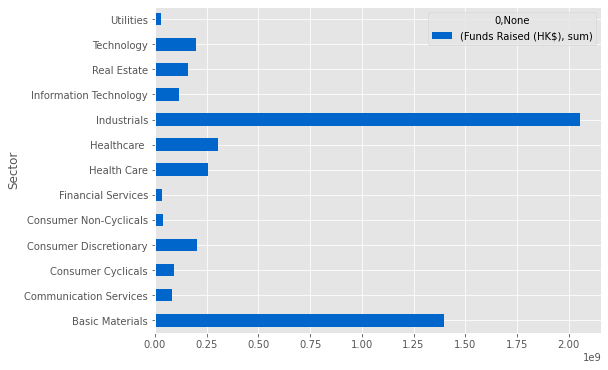

In [115]:
obs.groupby(['Sector']).agg({'Funds Raised (HK$)': ['sum']}).plot.barh(legend = True, color = new_color);

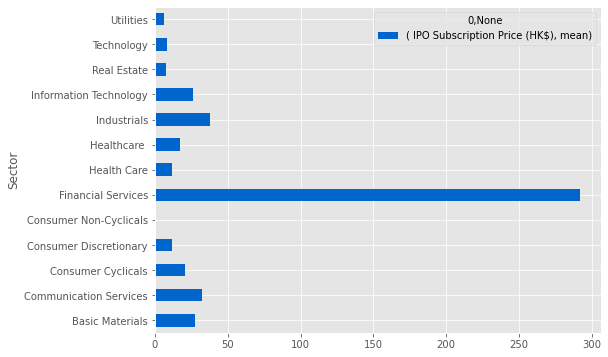

In [116]:
obs.groupby(['Sector']).agg({' IPO Subscription Price (HK$)': ['mean']}).plot.barh(legend=True, color = new_color);

In [10]:
obs_date = obs.sort_values(['Date of Listing (dd/mm/yy)'])

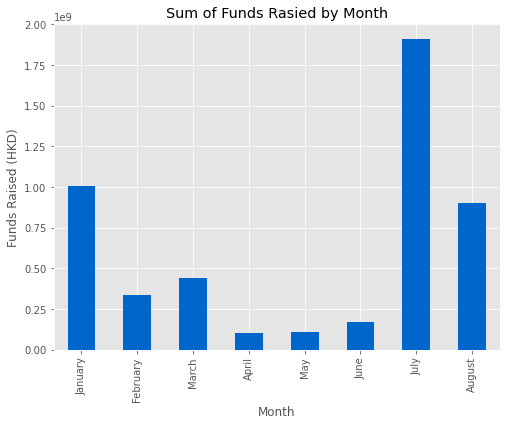

In [117]:
grouped = obs.groupby(pd.Grouper(key='Date of Listing (dd/mm/yy)', freq='M'))['Funds Raised (HK$)'].sum()

grouped.index = grouped.index.strftime('%B')

grouped.plot(kind='bar', legend=None, color = new_color)
plt.xlabel('Month')
plt.ylabel('Funds Raised (HKD)')
plt.title('Sum of Funds Rasied by Month')
plt.show()

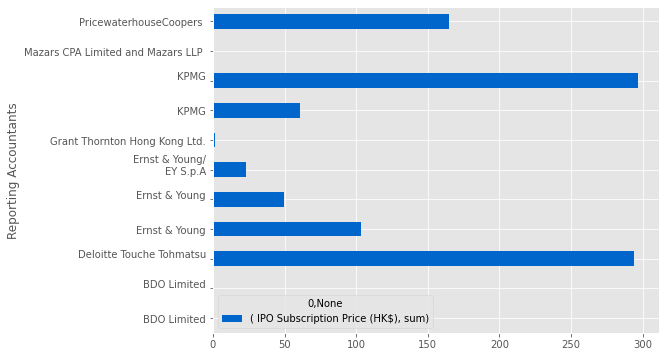

In [118]:
obs.groupby(['Reporting Accountants']).agg({' IPO Subscription Price (HK$)': ['sum']}).plot.barh(legend=True, color = new_color);

In [15]:
obs['Reporting Accountants'].value_counts()

PricewaterhouseCoopers                17
Ernst & Young                          5
KPMG\n                                 5
Ernst & Young\n                        5
KPMG                                   3
Deloitte Touche Tohmatsu\n             2
Grant Thornton Hong Kong Ltd.          1
BDO Limited                            1
Ernst & Young/\nEY S.p.A\n             1
BDO Limited\n                          1
Mazars CPA Limited and Mazars LLP      1
Name: Reporting Accountants, dtype: int64

### Stock Data at 3 Months Post-IPO

In [16]:
def save_variable(value, name):
    globals()[name] = value

In [17]:
symbols = obs['Stock Code'].tolist()

In [18]:
dataset3mo = obs.filter(['Stock Code','Date of Listing (dd/mm/yy)','3 Months After Listing'], axis=1)

In [19]:
desired_end_dates = {}
i  = 0
while i<42:
    desired_end_dates[dataset3mo.iloc[i,0]] = dataset3mo.iloc[i,2]
    i=i+1

In [20]:
def download_stock_data(stock_symbol, end_date):
    stock_data = yf.download(stock_symbol, start='2022-01-01', end=end_date)['Adj Close']
    stock_data = pd.Series(stock_data, name = stock_symbol)
    save_variable(stock_data, 'Data'+stock_symbol.replace('.HK',''))
#    stock_data.plot(label=stock_symbol)

In [21]:
i=0
while i<42:
    download_stock_data(symbols[i], desired_end_dates[symbols[i]])
    i=i+1

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [22]:
stock_data_list = []
i=0
while i<42:
    stock_data_list.append('Data'+symbols[i].replace('.HK',''))
    i=i+1

In [23]:
Data9638.iloc[-1]

18.239999771118164

In [24]:
dataset3mo = dataset3mo.drop([39],axis=0)

In [25]:
i=0
dict_difference = {}
while i<41:
    name = 'Data'+dataset3mo.iloc[i,0].replace('.HK','')
    series = globals()[name]
    difference = series.iloc[-1] - series.iloc[0]
    dict_difference[dataset3mo.iloc[i,0]] = difference
    i=i+1

In [48]:
df_difference =  pd.DataFrame(dict_difference, index=['Difference'])

In [55]:
df_difference = df_difference.transpose()

In [56]:
df_difference.mean(axis=0)

Difference   -3.446062
dtype: float64

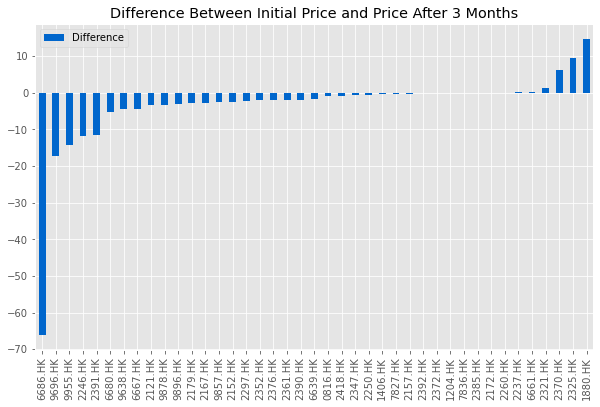

In [119]:
plt.rcParams["figure.figsize"] = (10,6)
ax = df_difference['Difference'].sort_values(ascending =True).plot.bar(legend = True, color = new_color)
ax.set_title('Difference Between Initial Price and Price After 3 Months');

In [28]:
merged = pd.concat([Data2260,
 Data6680,
 Data2250,
 Data2121,
 Data1406,
 Data9878,
 Data2157,
 Data0816,
 Data7836,
 Data6639,
 Data9638,
 Data2179,
 Data2370,
 Data2390,
 Data2352,
 Data2325,
 Data2347,
 Data7827,
 Data6667,
 Data2246,
 Data2372,
 Data2167,
 Data2391,
 Data9955,
 Data2297,
 Data2376,
 Data2392,
 Data2361,
 Data2385,
 Data6661,
 Data9896,
 Data6686,
 Data9696,
 Data1204,
 Data2418,
 Data2172,
 Data2237,
 Data9857,
 Data7841,
 Data2321,
 Data2152,
 Data1880], axis=1, join='outer')

In [29]:
Data7841

Series([], Name: 7841.HK, dtype: float64)

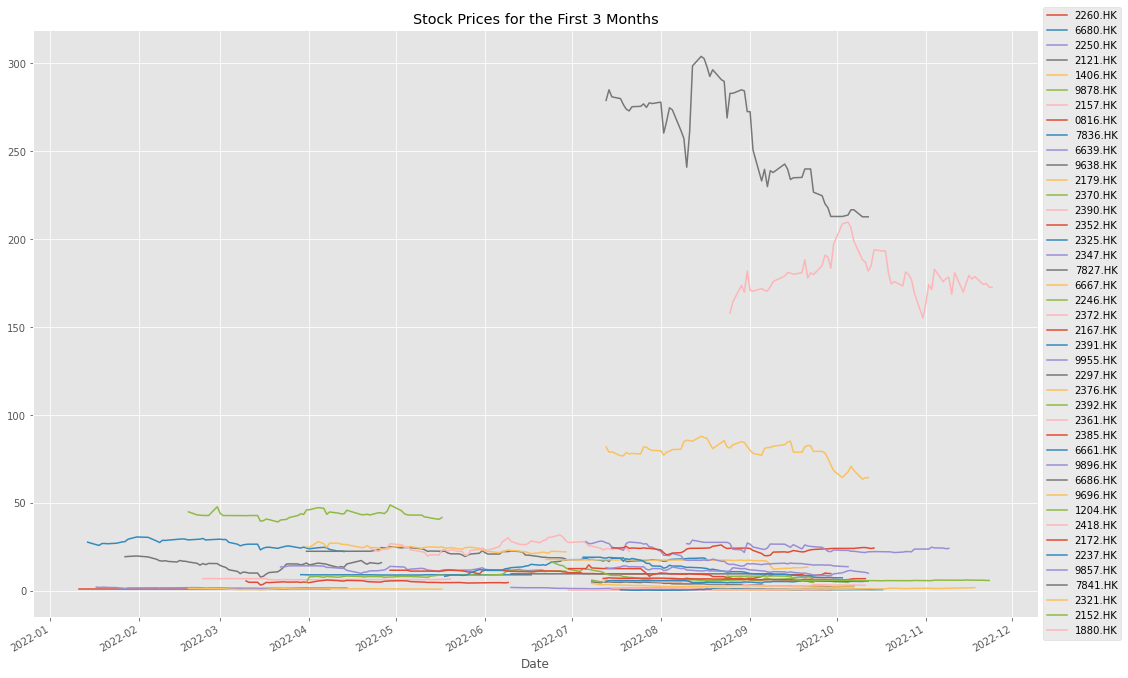

In [30]:
plt.rcParams["figure.figsize"] = (18,12)
ax = merged.plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Stock Prices for the First 3 Months');

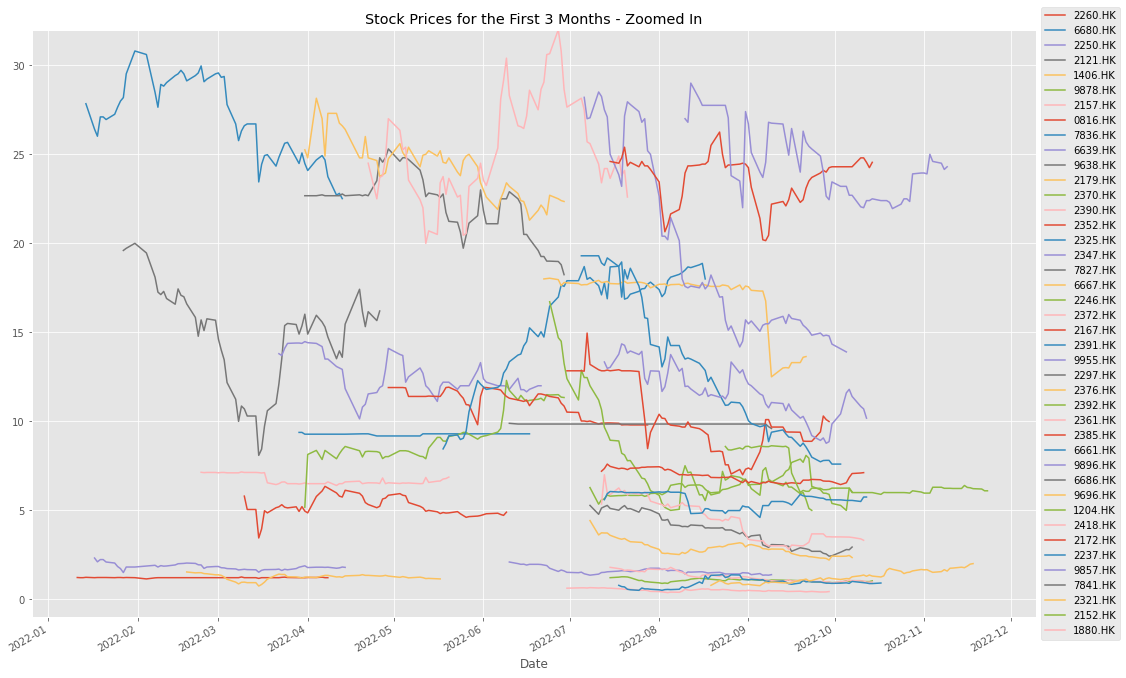

In [31]:

plt.rcParams["figure.figsize"] = (18,12)
ax = merged.plot()
ax.set_ylim([-1, 32])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Stock Prices for the First 3 Months - Zoomed In');

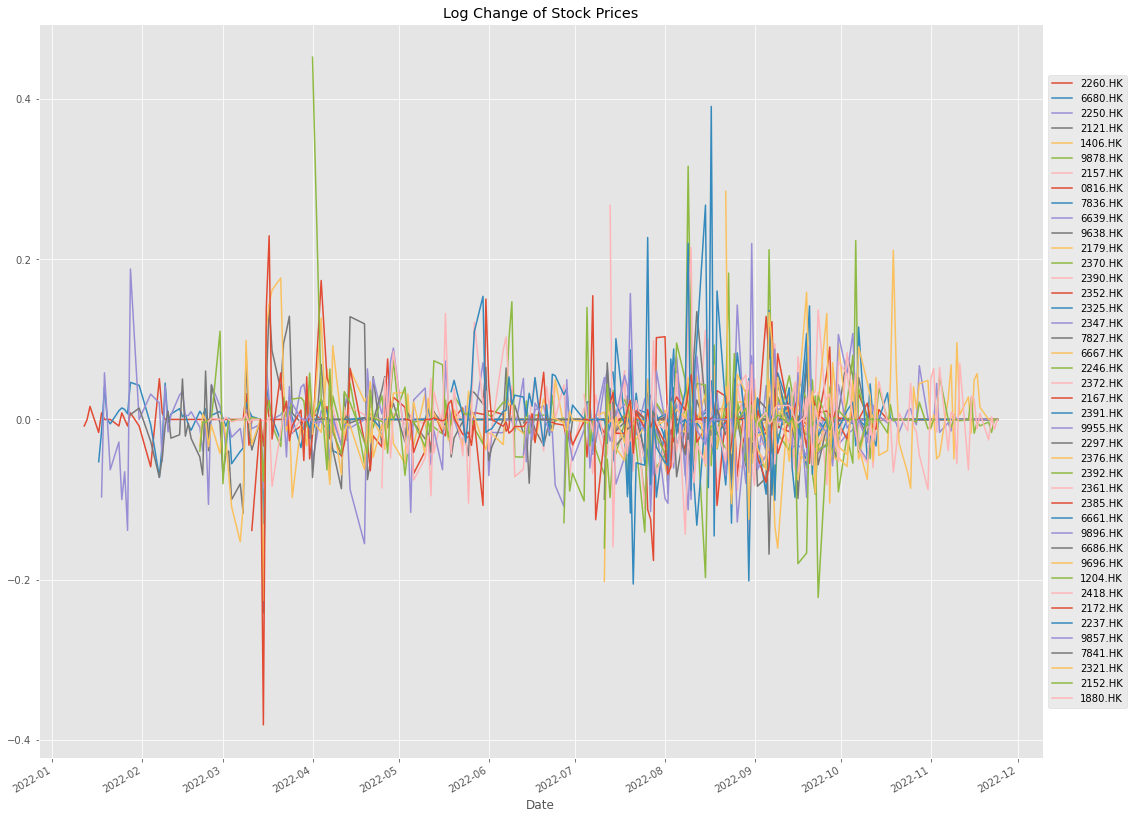

In [32]:
# plot the log change for each column
plt.rcParams["figure.figsize"] = (18,15)
np.log(merged.pct_change() + 1).plot(kind='line')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Log Change of Stock Prices')
plt.show()

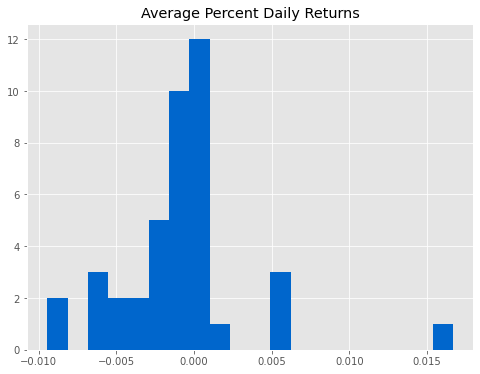

In [114]:
returns = merged.pct_change()
meanDailyReturns = returns.mean()
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Average Percent Daily Returns')
meanDailyReturns.hist(bins =20, color = new_color)
plt.show();

In [106]:
#%history